In [1]:
import numpy as np
import pandas as pd
import rnn as rnn
import importlib

# Exercise 1: Implement and train a vanilla RNN
## 0.1 Read in the data
attributes: book_data, book_chars, vocab_len, char_to_ind, ind_to_char

In [2]:
importlib.reload(rnn)
book_fname = '../Dataset/goblet_book.txt'
data = rnn.TextData(book_fname)
data.vocab_len

80

## 0.2 Set hyper-parameters & initialize the RNN's parameters

In [34]:
importlib.reload(rnn)
net = rnn.RNN()
net.W

array([[-0.00033025, -0.0050365 , -0.00172375, ...,  0.01162574,
         0.00435546,  0.00166485],
       [-0.02396082, -0.0067898 , -0.00480574, ...,  0.02077343,
         0.02206469,  0.0007965 ],
       [-0.03836656,  0.01236832, -0.00540376, ...,  0.00377263,
        -0.00187227,  0.01032658],
       ...,
       [-0.00182315,  0.00106435,  0.01268359, ...,  0.01896604,
        -0.00044599, -0.00705985],
       [ 0.01168769,  0.0005523 , -0.00348308, ...,  0.00994518,
        -0.0069733 , -0.00300835],
       [-0.00616148, -0.00392675, -0.01031827, ...,  0.00785255,
        -0.01149305,  0.01031416]])

## 0.3 Synthesize text from your randomly initialized RNN

In [70]:
importlib.reload(rnn)
net = rnn.RNN()
h0 = np.zeros((net.m, 1))
txt = net.synthesize_text(h0, 2, 9, True)
txt

'U-D\nywHol'

## 0.4 Implement the forward & backward pass of back-prop

In [4]:
seq_length = 25
m = 100
h0 = np.zeros((m, 1))
X_chars = data.book_data[:seq_length]
Y_chars = data.book_data[1:seq_length+1]

### One hot encode data

In [5]:
importlib.reload(rnn)
_, X_train = data.one_hot_encode_X(X_chars)
y_train, _ = data.one_hot_encode_X(Y_chars)
X_train.shape

(25, 80, 1)

In [7]:
y_train.shape

(25,)

### Forwardpass

In [9]:
importlib.reload(rnn)
net = rnn.RNN()
loss = net.forward_pass(h0, X_train, y_train)
loss

109.54593130164336

### Backwardpass

In [11]:
importlib.reload(rnn)
net = rnn.RNN()
loss = net.forward_pass(h0, X_train, y_train)
net.backward_pass(X_train, y_train)

In [12]:
importlib.reload(rnn)
net = rnn.RNN()
loss, h = net.back_propagation(h0, X_train , y_train)
loss

109.54593130164336

### Check gradients

In [19]:
importlib.reload(rnn)
net = rnn.RNN()
net.check_gradients(X_train, y_train, h0)

Gradient checks:
The maximum relative error for the W gradient is: 9.444390e-06.
The maximum relative error for the U gradient is: 2.965983e-07.
The maximum relative error for the V gradient is: 2.748042e-05.
The maximum relative error for the b gradient is: 2.023117e-06.
The maximum relative error for the c gradient is: 6.354765e-09.



## 0.5 Train your RNN using AdaGrad

  0%|          | 0/1 [00:00<?, ?it/s]Iter=0 | smooth loss=109.54593130164336
Synthetized text | :sYF	Gh WDmü!/G"nn0D;60rWJ D(zvH3N,606TdcTv(eD	)fA!vox-)duYagnv)k^)SdlUb.Iwl"1(z.Gagathxshn.N2} üPhqAgTsZeOWVV(61PE;x
r69-613Ze'ap03qO1?Rdbdy2hN^_i'?Ek .IIgryUtu)N_HVCOu^,(1-aA:aNX-);9JeR' c12tmUTx(L-
Iter=100 | smooth loss=112.30116188725052
Iter=200 | smooth loss=111.8831149102993
Iter=300 | smooth loss=110.61084547665908
Iter=400 | smooth loss=109.14780640131309
Iter=500 | smooth loss=108.3942183511211
Synthetized text | onr rhl-,faeEhshsos  QAyd t'O eda  wo  n dlyntn- QgENtht'ol.iyd a uhopdxAu e t r,iry eusssrrat stbOQ rar lunor daa  "zotidyhnitoosdry  stWOsddEeatotsprryreoocsh,rNitPh-w.e Afc.uuor gy wietssadaa efstO
Iter=600 | smooth loss=107.61830328662343
Iter=700 | smooth loss=106.73928918900155
Iter=800 | smooth loss=105.38695504888432
Iter=900 | smooth loss=104.48727495349846
Iter=1000 | smooth loss=103.1043720924173
Synthetized text |  cei dsvh
ek e tast  rlh.dosntheIs u.y estIh o

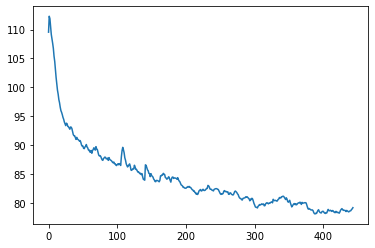

In [17]:
importlib.reload(rnn)
net = rnn.RNN()
net.train_rnn(epochs=1, n=200, eta=.05, verbose=True, backup=True)